In [2]:
import numpy as np

In [8]:
import pickle

with open("../data/centralatom-C_numberhydrogens-1/data-for-analysis.pkl", 'rb') as file:
    data = pickle.load(file)

In [9]:
X, y = data

# Find out samples in X that are the same in terms of molecules and bondings!

In [19]:
constellations = []
for sample in X:
    current = []
    for i, value in enumerate(sample):
        if int(i-1) % 5 == 0:
            current.append(value)
        elif int(i-2) % 5 == 0:
            current.append(value)
    constellations.append(current)

In [22]:
X[:2]

[[6,
  6,
  1,
  0.5790000000000006,
  0.3359999999999985,
  1.25,
  6,
  2,
  0.6099999999999994,
  -0.9750000000000014,
  -0.8120000000000012],
 [6,
  6,
  1,
  -1.1920000000000002,
  0.6399999999999988,
  -0.4410000000000025,
  6,
  2,
  0.5790000000000006,
  0.32899999999999885,
  1.2489999999999988]]

In [25]:
constellations[:10]

[[6, 1, 6, 2],
 [6, 1, 6, 2],
 [6, 1, 6, 1, 7, 1],
 [6, 1, 6, 1, 8, 1],
 [6, 2, 7, 1],
 [6, 1, 7, 2],
 [6, 2, 6, 1],
 [6, 1, 6, 2],
 [6, 1, 6, 2],
 [6, 2, 6, 1]]

## make tuples

In [26]:
# Function to convert a list of integers to a list of tuples
def make_tuples(constellation):
    return [(constellation[i], constellation[i + 1]) for i in range(0, len(constellation), 2)]

# Convert the lists into tuples
constellations_tuples = [make_tuples(constellation) for constellation in constellations]
constellations_tuples[:10]

[[(6, 1), (6, 2)],
 [(6, 1), (6, 2)],
 [(6, 1), (6, 1), (7, 1)],
 [(6, 1), (6, 1), (8, 1)],
 [(6, 2), (7, 1)],
 [(6, 1), (7, 2)],
 [(6, 2), (6, 1)],
 [(6, 1), (6, 2)],
 [(6, 1), (6, 2)],
 [(6, 2), (6, 1)]]

## sort tuples first wrt to atomic number then wrt value order

In [27]:
# Function to sort a constellation by atomic number and then by value order
def sort_constellation(constellation):
    return sorted(constellation, key=lambda x: (x[0], x[1]))

# Sort all constellations first
sorted_constellations = [sort_constellation(constellation) for constellation in constellations_tuples]
sorted_constellations[:10]

[[(6, 1), (6, 2)],
 [(6, 1), (6, 2)],
 [(6, 1), (6, 1), (7, 1)],
 [(6, 1), (6, 1), (8, 1)],
 [(6, 2), (7, 1)],
 [(6, 1), (7, 2)],
 [(6, 1), (6, 2)],
 [(6, 1), (6, 2)],
 [(6, 1), (6, 2)],
 [(6, 1), (6, 2)]]

## group the tuples

In [ ]:
# Dictionary to store groups of constellations with their indices
constellation_groups = {}

# Iterate through the sorted constellations
for index, sorted_constellation in enumerate(sorted_constellations):
    # Convert the list to a tuple to use as a dictionary key
    constellation_key = tuple(sorted_constellation)
    
    # If the constellation is already in the dictionary, append the index
    if constellation_key in constellation_groups:
        constellation_groups[constellation_key].append(index)
    # Otherwise, create a new entry with the current index
    else:
        constellation_groups[constellation_key] = [index]

In [29]:
constellation_groups.keys()

dict_keys([((6, 1), (6, 2)), ((6, 1), (6, 1), (7, 1)), ((6, 1), (6, 1), (8, 1)), ((6, 2), (7, 1)), ((6, 1), (7, 2)), ((6, 1), (6, 1), (6, 1)), ((6, 1), (7, 1), (8, 1)), ((7, 1), (7, 2)), ((6, 1), (7, 1), (15, 1)), ((6, 2), (16, 1)), ((6, 1), (8, 1), (8, 1)), ((5, 1), (6, 1), (7, 1)), ((6, 2), (8, 1)), ((7, 1), (8, 2)), ((6, 1), (6, 1), (17, 1)), ((6, 1), (8, 1), (34, 1)), ((6, 1), (6, 1), (44, 1)), ((6, 1), (6, 1), (9, 1)), ((7, 2), (16, 1)), ((6, 1), (6, 1), (16, 1)), ((6, 1), (7, 1), (16, 1)), ((6, 1), (16, 1), (16, 1)), ((6, 1), (8, 2)), ((6, 3),), ((6, 1), (7, 1), (7, 1)), ((6, 1), (9, 1), (9, 1)), ((7, 1), (16, 2)), ((6, 1), (8, 1), (16, 1)), ((6, 2), (34, 1)), ((6, 1), (15, 1), (15, 1)), ((7, 1), (7, 1), (7, 1)), ((6, 1), (8, 1), (15, 1)), ((6, 1), (15, 1), (16, 1)), ((6, 1), (6, 2), (76, 1)), ((7, 1), (15, 1), (15, 1)), ((5, 1), (6, 2)), ((8, 1), (8, 1), (15, 1)), ((9, 1), (9, 1), (16, 1)), ((6, 1), (6, 1), (53, 1)), ((6, 2), (15, 1)), ((6, 1), (6, 1), (34, 1)), ((8, 1), (9, 1),

In [30]:
len(constellation_groups.keys())

93

# Go through the indices of group (6, 1), (6, 2)

In [34]:
target_X = [X[i] for i in constellation_groups[((6, 1), (6, 2))]]
target_y = [y[i] for i in constellation_groups[((6, 1), (6, 2))]]

# Show statistics of the distance from central atom to hydrogen for the group (6,1),(6,2)

In [35]:
# Compute the length of each 3D vector
central_to_hydrogen_distances = np.linalg.norm(target_y, axis=1)

In [37]:
central_to_hydrogen_distances[:10]

array([1.10359503, 1.10338751, 1.10351665, 1.10373412, 1.10367115,
       1.10353523, 1.10322527, 1.10262686, 1.10259195, 1.07986851])

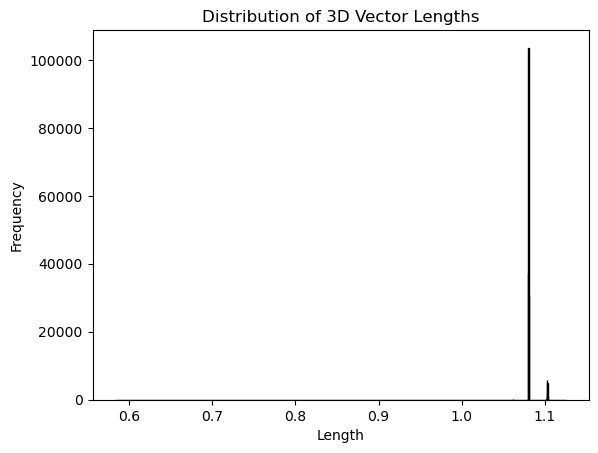

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a distribution plot of the lengths
plt.hist(central_to_hydrogen_distances, bins=1000, edgecolor='black')
plt.title('Distribution of 3D Vector Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Hasan\AppData\Local\Temp\ipykernel_19944\2693222057.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(central_to_hydrogen_distances, shade=True)


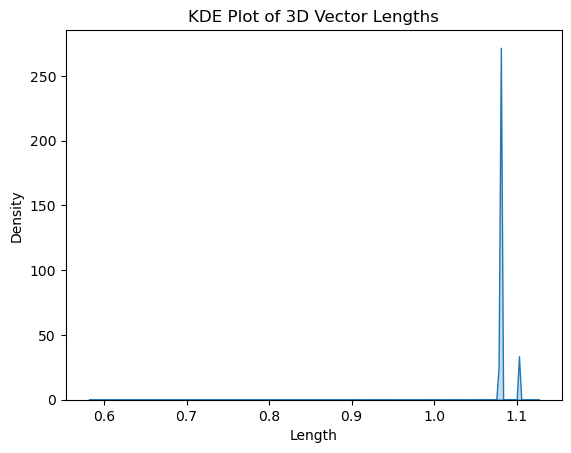

In [40]:
import seaborn as sns

# Create a KDE plot of the lengths
sns.kdeplot(central_to_hydrogen_distances, shade=True)
plt.title('KDE Plot of 3D Vector Lengths')
plt.xlabel('Length')
plt.ylabel('Density')
plt.show()

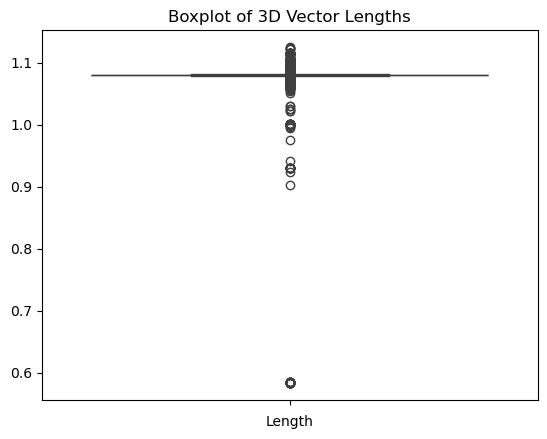

In [42]:
# Create a boxplot of the lengths
sns.boxplot(y=central_to_hydrogen_distances)
plt.title('Boxplot of 3D Vector Lengths')
plt.xlabel('Length')
plt.show()

In [45]:
print("Mean: ", np.mean(central_to_hydrogen_distances))
print("Mean: ", np.var(central_to_hydrogen_distances))

Mean:  1.0816236431117139
Mean:  7.056864065533455e-05
